In [0]:
work_path = ""

In [0]:
import nltk
nltk.download('stopwords')

In [0]:
!pip install pymystem3 python-rake wordcloud gensim pyLDAvis

# Анализ новостных сообщений

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

df = pd.read_csv(work_path + 'news.csv')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [0]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

Результат:

In [10]:
df.text.iloc[0]

'в петербурге прошел митинг против передачи исаакиевского собора рпц в санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора в безвозмездное пользование рпц жители петербурга собрались на исаакиевской площади чтобы высказаться против передачи исаакиевского собора в безвозмездное пользование рпц передает тасс акция проходит в формате встречи с депутатами законодательного собрания города и не требует согласования с властями участники акции не используют какую либо символику и плакаты а также мегафоны или средства звукоусиления по словам депутата алексея ковалева на исаакиевскую площадь пришло примерно тысяча человек перед участниками протеста выступили депутаты местного парламента борис вишневский и максим резник которые заявили о том что потребуют отмены решения смольного вишневский сообщил что акция будет проходить в виде встречи депутатов с избирателями закон санкт петербурга предоставляет нам право встречаться с избирателями такую встречу мы и проведем ра

### Самые частые слова

In [11]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(10):
    print(i)

('в', 43571)
('и', 25182)
('на', 19120)
('что', 13617)
('не', 11953)
('с', 10868)
('по', 9080)
('о', 5035)
('это', 4955)
('он', 4761)


## Обработка текстов



### Удаление стоп-слов

In [14]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)   

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

### Лемматизация

In [17]:
%%time 
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

Installing mystem to /content/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz


CPU times: user 5.18 s, sys: 428 ms, total: 5.61 s
Wall time: 34.6 s


### Удаление стоп-лемм

In [0]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

Самые частые леммы:

In [19]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('россия', 5643)
('год', 4750)
('москва', 4632)
('человек', 4556)
('путин', 4357)
('президент', 4109)
('выборы', 2849)
('вопрос', 2672)
('российский', 2312)
('время', 2261)


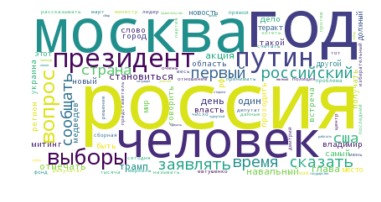

In [22]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS по-сложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные этапы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* RAKE [Rose et al., 2010]
* Синтаксические шаблоны

### Морфологические шаблоны

Можно использовать Томита-парсер. Вообще говоря, (далее цитата) Томита-парсер создан для извлечения структурированных данных из текста на естественном языке. Вычленение фактов происходит при помощи контекстно-свободных грамматик и словарей ключевых слов. Парсер позволяет писать свои грамматики и добавлять словари для нужного языка. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

![рисунок](https://github.com/echernyak/nlp-course-sberbank/blob/master/img/tomita1.png?raw=true)

[ссылка](https://tech.yandex.ru/tomita/)

Переезжаем из DataFrame в списки:

In [0]:
tokens_by_topic = []
for event in df.event.unique():
    tokens = []
    sample = df[df.event==event]
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

Выберем событие, из текстов про которое будем извлекать ключевые слова:

In [0]:
event_id = 3

### Использование мер связности 


$w_1, w_2$ -- два слова

$f(w_1), f(w_2)$ -- их частоты

$f(w_1, w_2)$ -- совместная частота биграммы $w_1 w_2$

$N$ -- число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$, $\texttt{log likelihood}$

Извлекаем биграммы по разным мерам связности:

In [25]:
%%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(10) # избавимся от биграм, которые встречаются реже  десяти раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 163 ms, sys: 4 ms, total: 167 ms
Wall time: 168 ms


In [26]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,дмитрий медведев,почтовый ящик,дмитрий медведев,грин ярд,премьер министр
1,премьер министр,грин ярд,премьер министр,инвестиционный содружество,дмитрий медведев
2,фонд дар,проектный документация,фонд дар,красный поляна,фонд дар
3,миллиард рубль,красный поляна,миллиард рубль,почтовый ящик,илья елисеев
4,илья елисеев,юрфак лгать,илья елисеев,рублево успенский,миллиард рубль
5,алексей навальный,инвестиционный содружество,алексей навальный,ярко выраженный,цертум инвест
6,расследование фбк,бесполетный зона,борьба коррупция,квадратный метр,борьба коррупция
7,борьба коррупция,автомобильный лифт,расследование фбк,пресс секретарь,скалистый берег
8,цертум инвест,править партия,цертум инвест,кушелев безбородко,квадратный метр
9,фонд борьба,культурный инициатива,фонд борьба,краснодарский край,доверенный лицо


Похожи ли списки биграм?

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


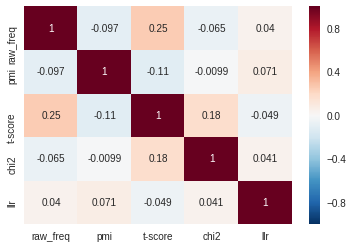

In [27]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

In [28]:
word_filter = lambda w1, w2: "россия" not in (w1, w2)

N_best = 10 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_ngram_filter(word_filter) 
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,россия рубеж,россия внешэкономсвязь,россия рубеж,россия рубеж,россия рубеж
1,единый россия,россия заботиться,единый россия,единый россия,единый россия
2,винодельня россия,россия обрекать,винодельня россия,россия граница,винодельня россия
3,министр россия,россия привыкать,президент россия,винодельня россия,россия граница
4,президент россия,россия пустой,министр россия,россия подчеркивать,президент россия
5,россия дмитрий,россия символ,россия дмитрий,современный россия,министр россия
6,россия граница,россия соответвовать,россия граница,строитель россия,россия дмитрий
7,россия владеть,россия сподвижник,россия владеть,россия внешэкономсвязь,современный россия
8,весь россия,россия увы,весь россия,россия заботиться,россия владеть
9,россия главный,россия рубеж,современный россия,россия обрекать,весь россия


### TextRank

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми. 
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

PageRank: $PR(V_i)=(1-d)+d \times \sum_{V_j \in In(V_i)} \frac{PR(V_j)}{|Out(V_j)|}$

In [31]:
%%time
from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[event_id])
kw = keywords(text)

CPU times: user 39.7 s, sys: 7.59 s, total: 47.3 s
Wall time: 46.5 s


Результаты:

In [32]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

,Text Rank
0,дмитрии медведев фото александр
1,навальныи собирать
2,описание проходить расследование
3,такои
4,самыи схема
5,премьер министр россия
6,этот
7,яхта
8,второи человек
9,усадьба


### RAKE

* Кандидаты-фразы – все слова между разделителями – стоп-словами и знаками пунктуации
* Оценка кадидата-фразы $p$: $\frac{deg(p)}{freq(p)}$
* Ограничения по частоте и количеству слов в кандидате-фразе

Для RAKE нужны сырые тексты со стоп-словами.

In [0]:
raw_df = pd.read_csv(work_path + 'news.csv')
raw_df.text = raw_df.text.str.lower()
raw_df.text = raw_df.text.apply(words_only)
raw_df.text = raw_df.text.apply(lemmatize)

In [0]:
text = ' '.join(raw_df[raw_df.event == raw_df.event.unique()[3]].text.tolist())

In [39]:
import RAKE

Rake = RAKE.Rake(work_path + '/stopwords.txt')
kp = [i[0] for i in Rake.run(text) if len(i[0].split())<3 and len(i[0].split())>1 and i[1]>1 and i[0] != '- -']
rankings = pd.DataFrame({'RAKE': kp})
rankings.head(10)

,RAKE
0,юрфак лгать
1,квадратный метр
2,одноименный башня
3,доверенный лицо
4,почтовый ящик
5,алексей четвертков
6,европейский университет
7,заголовок раздел
8,скалистый берег
9,рыночный стоимость


## Мера контрастности $tf-idf$


Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.
Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается. 

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов}: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [40]:
%%time 
from nltk.text import TextCollection 
tfidf_values = [] 
tfidf_ranking = []
corpus = TextCollection(tokens_by_topic) # класс для вычисления tf-idf
for i in set(tokens_by_topic[event_id]): # цикл по всем уникальным токенам в этом разделе
    tfidf_values.append([i, corpus.tf_idf(i, tokens_by_topic[event_id])]) # вычисляем tf-idf
for i in sorted(tfidf_values,key=lambda l:l[1], reverse=True)[:N_best]: # выбираем топ-100 по tf-idf
    tfidf_ranking.append(i[0])

CPU times: user 40.8 s, sys: 12 ms, total: 40.8 s
Wall time: 40.9 s


In [44]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking = []
dense = tfidf_matrix.todense()

text = dense[event_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)



CPU times: user 683 ms, sys: 5 ms, total: 688 ms
Wall time: 695 ms


In [45]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

,tf-idf
0,медведев
1,фонд
2,фбк
3,дар
4,расследование
5,яхта
6,елисеев
7,усадьба
8,виноградник
9,навальный


### Задание 2

Измените ngram_range так, чтобы tf-idf веса вычислялись для пар слов. 

# Векторная модель 

|           | $d_1$      | $d_2$      | $\ldots$ | $d_{D}$    |
|-----------|------------|------------|----------|--------------|
| $w_1$     | $f_{11}$   | $f_{12}$   |          | $f_{1D}$   |
| $w_2$     | $f_{21}$   | $f_{22}$   |          | $f_{2D}$   |
| $\ldots$  |            |            |          |              |
| $w_{|V|}$ | $f_{V1}$ | $f_{V2}$ |          | $f_{VD}$ |


Косинусная мера близости в векторной модели [Salton et. al, 1975]: 
$ \cos(d_i, d_j) = \frac {d_i \times d_j}{||d_i||||d_j||} = \frac{\sum_k f_{ki} \times f_{kj}} {\sqrt{(\sum_k f_{ki})^2} \sqrt{(\sum_k f_{kj})^2}}$


Если вектора нормированы на длину $||d_i|| = ||d_j|| = 1$, $ \cos(d_i, d_j) = d_i \times d_j$

## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [0]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [47]:
print(dictionary)

Dictionary(22701 unique tokens: ['акция', 'алексей', 'безвозмездный', 'борис', 'буров']...)


In [48]:
print(corpus[0])

[(0, 5), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 6), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 5), (57, 6), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 3), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 3), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 8), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 2), (110, 1),

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [49]:
%%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

CPU times: user 142 ms, sys: 4 ms, total: 146 ms
Wall time: 150 ms


In [0]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

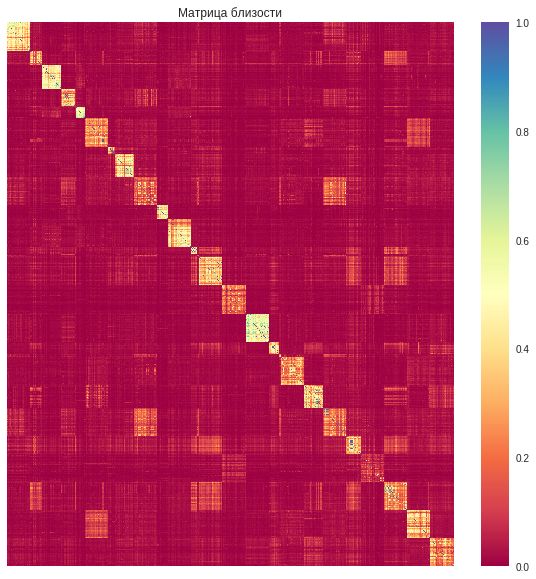

In [51]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

## Модели скрытых тем

### Латентно-семантический анализ

Сингулярное разложение: $M = U \Sigma V^T$

Снижение размерности с помощью сингулярного разложения: $M'_k = U \Sigma_k V^t_k$


![рисунок](https://github.com/echernyak/nlp-course-sberbank/blob/master/img/svd.jpg?raw=true)


![рисунок](https://github.com/echernyak/nlp-course-sberbank/blob/master/img/word2topic2doc.png?raw=true)

In [52]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=50)

CPU times: user 6.07 s, sys: 538 ms, total: 6.61 s
Wall time: 4.79 s


In [53]:
lsi.show_topics(5)

[(0,
  '-0.223*"путин" + -0.165*"трамп" + -0.146*"меркель" + -0.132*"президент" + -0.126*"выборы" + -0.115*"курортный" + -0.113*"навальный" + -0.112*"акция" + -0.109*"теракт" + -0.102*"сбор"'),
 (1,
  '0.551*"курортный" + 0.466*"сбор" + 0.234*"законопроект" + 0.212*"эксперимент" + 0.158*"инфраструктура" + 0.148*"введение" + 0.129*"вносить" + 0.119*"край" + 0.119*"крым" + 0.111*"алтайский"'),
 (2,
  '0.397*"собор" + 0.297*"исаакиевский" + 0.230*"передача" + 0.226*"рпц" + -0.224*"путин" + 0.211*"акция" + -0.208*"меркель" + -0.159*"трамп" + 0.149*"петербург" + 0.146*"навальный"'),
 (3,
  '0.323*"теракт" + -0.254*"собор" + 0.249*"барселона" + -0.190*"исаакиевский" + -0.178*"путин" + -0.177*"меркель" + 0.172*"лондон" + -0.148*"передача" + -0.144*"рпц" + 0.140*"евтушенко"'),
 (4,
  '-0.472*"евтушенко" + -0.347*"чуркин" + -0.306*"поэт" + -0.236*"евгений" + -0.166*"виталий" + -0.158*"умирать" + 0.156*"партия" + -0.140*"оон" + 0.138*"теракт" + 0.119*"великобритания"')]

Как снижение размерности влияет на матрицу близости:

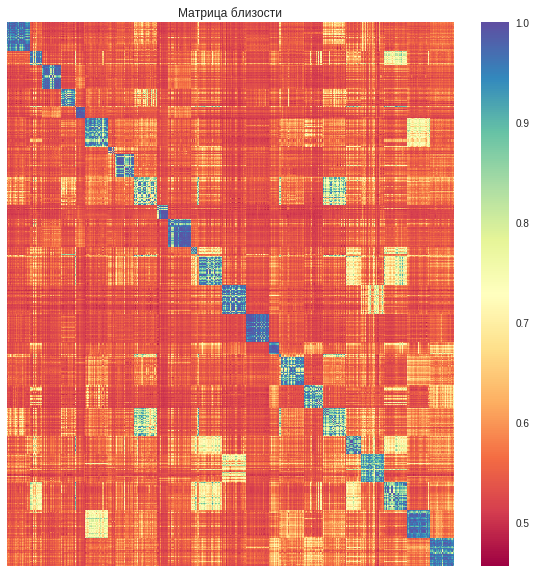

In [54]:
corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims  = (sims + 1)/2.
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

### Главные компоненты

In [0]:
X = [0] * len(df)
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                X[i] = topic[1]
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : df.event})

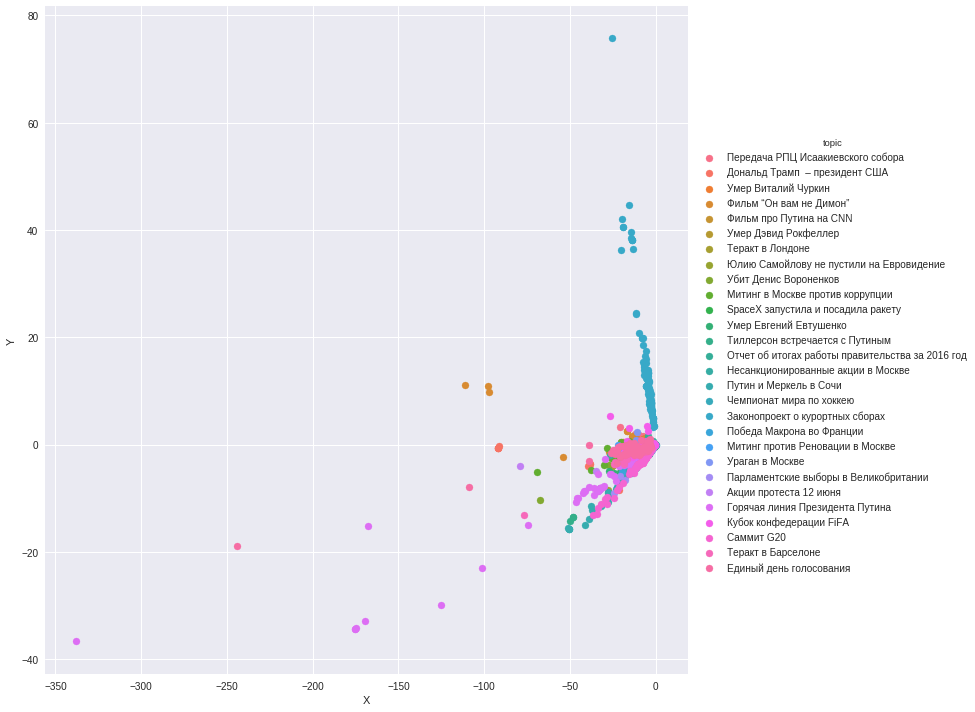

In [56]:
sns.FacetGrid(vis_df, hue="topic", size = 10).map(plt.scatter, "X", "Y").add_legend()

### Латентное размещение Дирихле

Генеративная модель порождения документа, оценивает распределение тем по документам и слов по темам.

In [57]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20,
                        alpha='auto', eta='auto', iterations = 20, passes = 10)

CPU times: user 59.2 s, sys: 39.6 s, total: 1min 38s
Wall time: 51.6 s


In [58]:
lda.show_topics(5)

[(8,
  '0.011*"соболезнование" + 0.010*"выражать" + 0.010*"путин" + 0.009*"теракт" + 0.008*"связь" + 0.007*"лондон" + 0.006*"президент" + 0.005*"россия" + 0.005*"мэй" + 0.005*"владимир"'),
 (9,
  '0.004*"год" + 0.003*"человек" + 0.003*"другой" + 0.003*"знать" + 0.003*"исчезать" + 0.003*"россия" + 0.003*"очень" + 0.003*"москва" + 0.002*"кристина" + 0.002*"орбакайте"'),
 (3,
  '0.018*"путин" + 0.018*"меркель" + 0.015*"россия" + 0.010*"президент" + 0.010*"украина" + 0.008*"германия" + 0.007*"встреча" + 0.007*"канцлер" + 0.007*"российский" + 0.006*"москва"'),
 (0,
  '0.020*"акция" + 0.018*"навальный" + 0.016*"митинг" + 0.014*"человек" + 0.012*"москва" + 0.010*"собор" + 0.008*"протест" + 0.008*"задерживать" + 0.008*"власть" + 0.007*"петербург"'),
 (14,
  '0.020*"москва" + 0.014*"курортный" + 0.013*"сбор" + 0.012*"человек" + 0.010*"ураган" + 0.008*"россия" + 0.008*"регион" + 0.007*"год" + 0.006*"сообщать" + 0.006*"май"')]

In [62]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


### TSNE

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

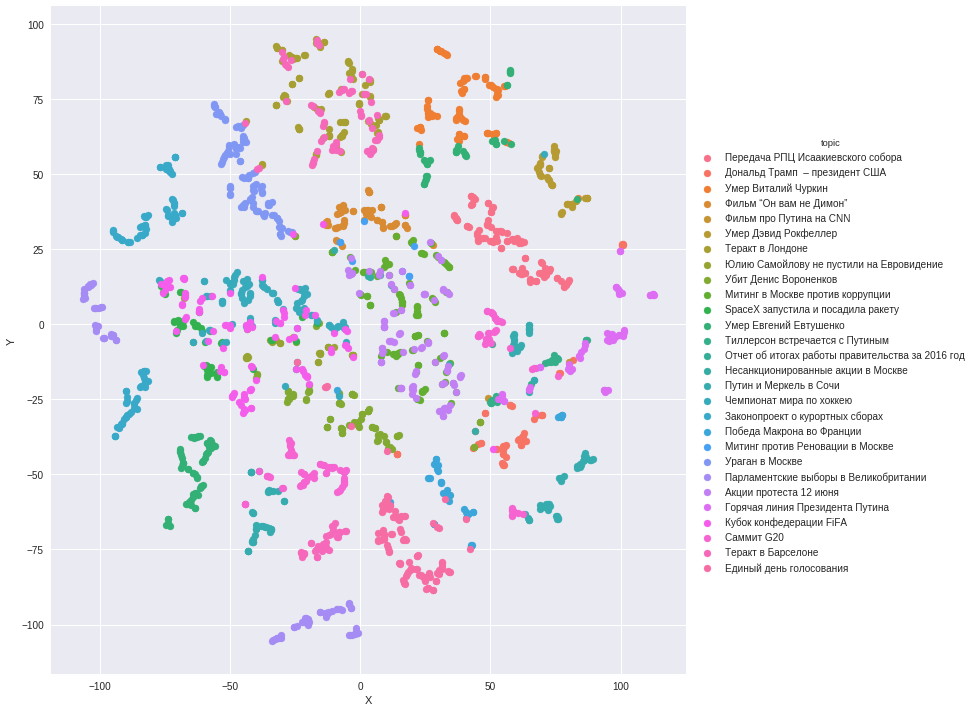

In [68]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.event})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()